In [144]:
import pandas as pd  #import all libraries
import matplotlib.pyplot as plt 
import ast
df = pd.read_csv("/Users/jastisarika/Downloads/data_jobs.csv")  #load the csv file
#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df.head(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


Investigate Trending skills - that means w ehave to find the skills that are posted over a time period.. here we are investigationg/aggregating these top skills that are posted over the months of the year like jan, feb, march 


In [145]:
df_da = df[df["job_title_short"]=="Data Analyst"].copy()
df_da.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."


In [146]:
df_da["job_posted_month_no"] = df["job_posted_date"].dt.month
df_da.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,NaN,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,NaN,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,NaN,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,NaN,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']},2


In [147]:
 # now we have to explode out the job skillls 
df_da_exploded = df_da.explode("job_skills")
df_da_exploded.head()


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",1


In [148]:
# df_da_exploded.pivot_table(index = "job_posted_month_no", columns = "job_skills" , aggfunc="size") 
 #after this i notice that there are nan values, but we cant plot nan values ..
# so turn them in to a 0 value 

In [149]:
df_da_pivot = df_da_exploded.pivot_table(index = "job_posted_month_no", columns = "job_skills" , aggfunc="size",fill_value=0) 
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [150]:
#there are lot of skills , 
# we need to filter dwon  the skills depnedning on the highest count of skills,
#  we will know by summing up or a total value athe end of each column pf the skill . for this we need a add a row at the end of each column by summing up 
df_da_pivot.loc['total'] = df_da_pivot.sum()

In [151]:
df_da_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,webex,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,197,17,551,63,2,20,2,1,29,34,...,17,228,6,1778,0,11,6,0,9,95
2,169,2,448,49,0,14,1,4,27,13,...,9,202,6,1235,4,2,5,0,4,41
3,181,4,442,34,0,23,6,1,17,13,...,8,194,8,1203,1,1,3,1,5,45
4,155,4,413,22,0,11,8,9,9,15,...,9,185,14,1177,8,2,1,0,6,26
5,128,8,310,30,0,19,9,2,8,21,...,11,122,3,957,3,4,0,0,7,18
6,164,14,393,29,0,14,9,4,16,16,...,8,157,14,1237,6,6,0,0,11,34
7,207,4,366,15,0,8,5,8,19,12,...,5,161,11,1069,0,3,0,0,6,38
8,197,3,413,21,0,12,10,3,13,12,...,9,184,11,1298,0,1,0,0,11,41
9,118,4,317,21,0,14,3,10,12,10,...,4,150,8,945,0,1,0,0,5,25


In [152]:
# # #now sort these columns by total 
# # df_da_pivot.loc['total'].sort_values(ascending = False ).index  #aftert this , we need column titles as a index...
# now pass the above one to a df_pivot to sort the columns by this
df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending = False ).index]  
df_da_pivot = df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending = False ).index]
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df_da_pivot = df_da_pivot.drop('total')
df_da_pivot



job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df_da_pivot.iloc[:,0:5]

job_skills,sql,excel,python,tableau,power bi
job_posted_month_no,,,,,
1,11336,8170,6606,5596,4285
2,7947,5772,4751,3936,3307
3,7868,5675,4741,4051,3176
4,7553,5496,4557,3776,3106
5,6617,4773,4070,3245,2695
6,7584,5724,4707,3812,3275
7,7687,5513,4831,3928,3350
8,8823,6482,5576,4533,3859
9,6829,4886,4229,3446,3118


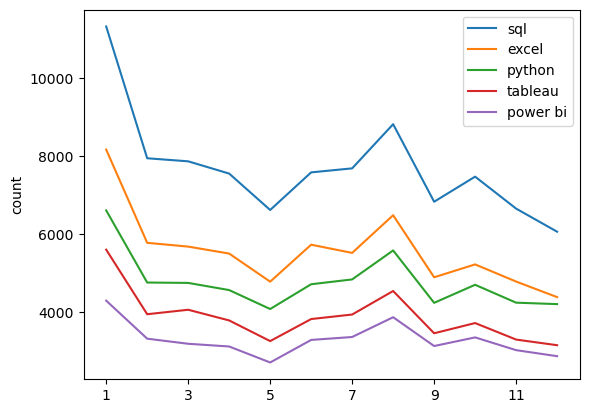

In [155]:
df_da_pivot.iloc[:,0:5].plot(kind='line')
plt.ylabel('count')
plt.xlabel('')
plt.legend()
plt.show()

In [156]:
df_da_pivot.head()

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1


In [157]:
df_da_pivot = df_da_pivot.reset_index()
df_da_pivot["job_posted_month"] = df_da_pivot["job_posted_month_no"].apply(lambda x: pd.to_datetime(x,format='%m').strftime('%B'))


In [158]:
df_da_pivot = df_da_pivot.set_index("job_posted_month")
df_da_pivot = df_da_pivot.drop(columns = 'job_posted_month_no')



In [159]:
df_da_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
January,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
February,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
March,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
April,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
May,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
June,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
July,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
August,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
September,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='job_posted_month'>

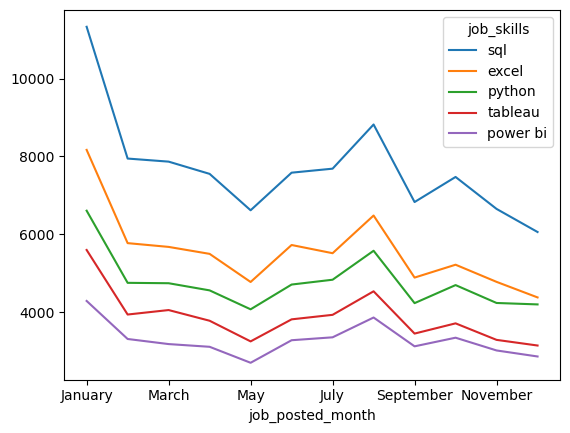

In [160]:
df_da_pivot.iloc[:,:5].plot(kind='line')